In [17]:
pip install yfinance pandas numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 119.4/119.4 kB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 8.1/8.1 MB 688.3 kB/s eta 0:00:00
     -------------------------------------- 64.8/64.8 kB 866.8 kB/s eta 0:00:00
     ------------------------------------ 949.2/949.2 kB 619.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -------------------------------------- 187.3/187.3 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 528.1 kB/s eta 0:00:00
     ------------------------------------ 435.3/435.3 kB 604.6 kB/s eta 0:00:00
     ---------------------------


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
# Define tickers and date range
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
start_date = '2019-01-01'
end_date = '2024-12-31'

# Download data one ticker at a time and build adj_close DataFrame
adj_close = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=False)
    adj_close[ticker] = data['Adj Close']
    
# Calculate daily returns
returns = adj_close.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.sum(returns.mean() * weights) * 252
    portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    sharpe_ratio = portfolio_return / portfolio_std

    results[0, i] = portfolio_return
    results[1, i] = portfolio_std
    results[2, i] = sharpe_ratio

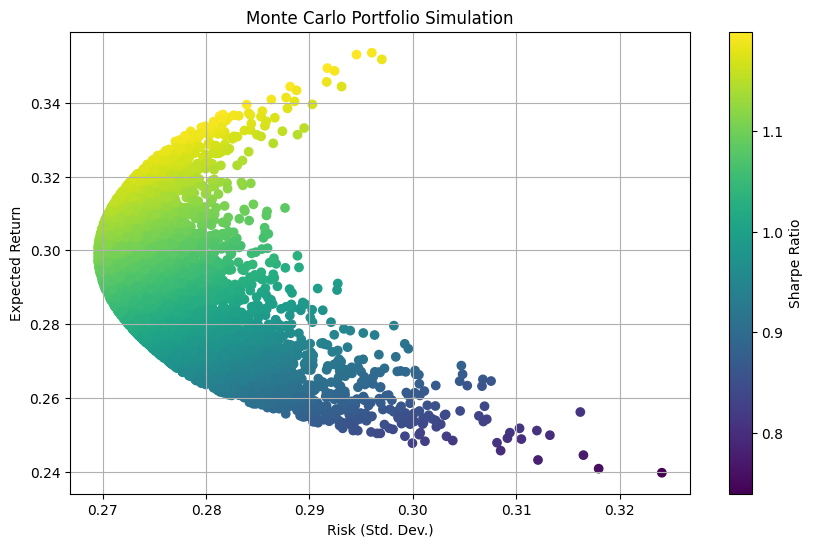

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(results[1], results[0], c=results[2], cmap='viridis')
plt.xlabel('Risk (Std. Dev.)')
plt.ylabel('Expected Return')
plt.title('Monte Carlo Portfolio Simulation')
plt.colorbar(label='Sharpe Ratio')
plt.grid(True)
plt.show()

In [8]:
# Convert results to DataFrame
results_df = pd.DataFrame({
    'Return': results[0],
    'Risk': results[1],
    'Sharpe': results[2]
})

# Find index of max Sharpe Ratio
max_sharpe_idx = results_df['Sharpe'].idxmax()

# Get best weights and metrics
best_weights = weights_record[max_sharpe_idx]
best_return = results_df.loc[max_sharpe_idx, 'Return']
best_risk = results_df.loc[max_sharpe_idx, 'Risk']
best_sharpe = results_df.loc[max_sharpe_idx, 'Sharpe']

# Print results
print("📈 Optimal Portfolio Allocation:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {best_weights[i]:.2%}")

print(f"\n✅ Expected Annual Return: {best_return:.2f}")
print(f"⚠️ Expected Risk (Std Dev): {best_risk:.2f}")
print(f"💡 Sharpe Ratio: {best_sharpe:.2f}")

📈 Optimal Portfolio Allocation:
AAPL: 83.84%
MSFT: 15.01%
GOOGL: 0.88%
AMZN: 0.27%

✅ Expected Annual Return: 0.35
⚠️ Expected Risk (Std Dev): 0.29
💡 Sharpe Ratio: 1.20
